# Lab: Binary classification attacks in MANET using Machine learning                                                      algorithms
## Process:
   ### 1. Data Processing
   ### 2. Model Selection & Evaluation
   ### 3. Result & Discusion


# 1. Data Preprocessing¶
## In this, we are going to preprocess data:
   ### 1.1 Data encoding
   ### 1.2 Drop unnecessary features
   ### 1.3 Data Normalization
   ### 1.4 Feature selection using pearson correlation
   ### 1.5 Data Split
# 2. Training Models
## In this, we are going to use the famous classifiers:
   ### 2.1 Training Neural Network
   ### 2.2 Training Random Forest
   ### 2.3 Training LogisticRegression
   ### 2.4 Training Gaussian Naive Bayes
# 3. Comparing our different models  

In [1]:
import numpy as np # manipulate multi-dimensional arrays and matrices of numerical data
import pandas as pd # it's a library for data manipulation and analysis

In [2]:
df = pd.read_csv('finalwormholeDataset.csv')

In [3]:
df.head()

,duration,protocol,Plength,flag,Mlength,HoP,LifeTime,MsgType,DSN,Sno,...,land,Tmode,Neighbors,Hflow,AvgFlow,Lflow,AvgHopCount,failedConnection,Failed Rate,Label
0,0.000000,AODV,84,0,28,0,2000,Route Reply,0,0,...,0,1,8,6367,1319.25,5,0.24832,2700,59.960027,normal
1,0.000978,ICMP,92,-1,28,-1,-1,-1,-1,0,...,2,0,8,6367,1319.25,5,0.24832,2700,59.960027,attack
2,0.028177,AODV,76,0,20,-1,-1,Route Error,0,1,...,2,1,8,6367,1319.25,5,0.24832,2700,59.960027,normal
3,0.001886,AODV,76,0,20,-1,-1,Route Error,0,1,...,2,1,8,6367,1319.25,5,0.24832,2700,59.960027,normal
4,0.001973,ICMP,92,-1,20,-1,-1,-1,-1,2,...,2,0,8,6367,1319.25,5,0.24832,2700,59.960027,attack


In [4]:
for x in df.columns:
    print(x,' ',df[x].dtype)

duration   float64
protocol   object
Plength   int64
flag   int64
Mlength   int64
HoP   int64
LifeTime   int64
MsgType   object
DSN   object
Sno   int64
Sindex   int64
land   int64
Tmode   int64
Neighbors   int64
Hflow   int64
AvgFlow   float64
Lflow   int64
AvgHopCount   float64
failedConnection   int64
Failed Rate   float64
Label   object


## 1.1 Data encoding

In [5]:
df

,duration,protocol,Plength,flag,Mlength,HoP,LifeTime,MsgType,DSN,Sno,...,land,Tmode,Neighbors,Hflow,AvgFlow,Lflow,AvgHopCount,failedConnection,Failed Rate,Label
0,0.000000,AODV,84,0,28,0,2000,Route Reply,0,0,...,0,1,8,6367,1319.25,5,0.248320,2700,59.960027,normal
1,0.000978,ICMP,92,-1,28,-1,-1,-1,-1,0,...,2,0,8,6367,1319.25,5,0.248320,2700,59.960027,attack
2,0.028177,AODV,76,0,20,-1,-1,Route Error,0,1,...,2,1,8,6367,1319.25,5,0.248320,2700,59.960027,normal
3,0.001886,AODV,76,0,20,-1,-1,Route Error,0,1,...,2,1,8,6367,1319.25,5,0.248320,2700,59.960027,normal
4,0.001973,ICMP,92,-1,20,-1,-1,-1,-1,2,...,2,0,8,6367,1319.25,5,0.248320,2700,59.960027,attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637857,0.001706,AODV,84,0,28,0,2000,Route Reply,0,4,...,0,1,10,6199,1001.30,2,0.189379,3031,72.685851,normal
637858,0.000979,ICMP,92,-1,28,-1,-1,-1,-1,4,...,2,0,10,6199,1001.30,2,0.189379,3031,72.685851,attack
637859,0.001409,AODV,84,0,28,0,2000,Route Reply,0,2,...,0,1,10,6199,1001.30,2,0.189379,3031,72.685851,normal
637860,0.001843,ICMP,92,-1,28,-1,-1,-1,-1,2,...,2,0,10,6199,1001.30,2,0.189379,3031,72.685851,attack


In [6]:
from sklearn.preprocessing import LabelEncoder # class that is used for encoding categorical variables
le = LabelEncoder()
protocol_labels = le.fit_transform(df['protocol'])
protocol_mappings = {index: label for index, label in 
                  enumerate(le.classes_)}
df["protocol"]=protocol_labels
protocol_mappings

{0: 'AODV', 1: 'ICMP', 2: 'UDP'}

In [7]:
msg_type = LabelEncoder()
msg_type_labels = msg_type.fit_transform(df['MsgType'])
msg_type_mappings = {index: label for index, label in 
                  enumerate(msg_type.classes_)}
df["MsgType"]=msg_type_labels
msg_type_mappings

{0: '-1',
 1: 'Route Error',
 2: 'Route Reply',
 3: 'Route Reply Acknowledgment',
 4: 'Route Request'}

In [8]:
label = LabelEncoder()
labels = label.fit_transform(df['Label'])
label_mappings = {index: label for index, label in 
                  enumerate(label.classes_)}
df["Label"]=labels
label_mappings

{0: 'attack', 1: 'normal'}

In [9]:
df

,duration,protocol,Plength,flag,Mlength,HoP,LifeTime,MsgType,DSN,Sno,...,land,Tmode,Neighbors,Hflow,AvgFlow,Lflow,AvgHopCount,failedConnection,Failed Rate,Label
0,0.000000,0,84,0,28,0,2000,2,0,0,...,0,1,8,6367,1319.25,5,0.248320,2700,59.960027,1
1,0.000978,1,92,-1,28,-1,-1,0,-1,0,...,2,0,8,6367,1319.25,5,0.248320,2700,59.960027,0
2,0.028177,0,76,0,20,-1,-1,1,0,1,...,2,1,8,6367,1319.25,5,0.248320,2700,59.960027,1
3,0.001886,0,76,0,20,-1,-1,1,0,1,...,2,1,8,6367,1319.25,5,0.248320,2700,59.960027,1
4,0.001973,1,92,-1,20,-1,-1,0,-1,2,...,2,0,8,6367,1319.25,5,0.248320,2700,59.960027,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637857,0.001706,0,84,0,28,0,2000,2,0,4,...,0,1,10,6199,1001.30,2,0.189379,3031,72.685851,1
637858,0.000979,1,92,-1,28,-1,-1,0,-1,4,...,2,0,10,6199,1001.30,2,0.189379,3031,72.685851,0
637859,0.001409,0,84,0,28,0,2000,2,0,2,...,0,1,10,6199,1001.30,2,0.189379,3031,72.685851,1
637860,0.001843,1,92,-1,28,-1,-1,0,-1,2,...,2,0,10,6199,1001.30,2,0.189379,3031,72.685851,0


In [10]:
df['Label'].value_counts()

0    485718
1    152144
Name: Label, dtype: int64

In [11]:
for x in df.columns:
    print(x,' ',df[x].dtype)

duration   float64
protocol   int32
Plength   int64
flag   int64
Mlength   int64
HoP   int64
LifeTime   int64
MsgType   int32
DSN   object
Sno   int64
Sindex   int64
land   int64
Tmode   int64
Neighbors   int64
Hflow   int64
AvgFlow   float64
Lflow   int64
AvgHopCount   float64
failedConnection   int64
Failed Rate   float64
Label   int32


In [12]:
df.isnull().sum() # check if there are missing values in each column of our dataset. 

duration            0
protocol            0
Plength             0
flag                0
Mlength             0
HoP                 0
LifeTime            0
MsgType             0
DSN                 0
Sno                 0
Sindex              0
land                0
Tmode               0
Neighbors           0
Hflow               0
AvgFlow             0
Lflow               0
AvgHopCount         0
failedConnection    0
Failed Rate         0
Label               0
dtype: int64

## 1.2 Drop unnecessary features

In [13]:
df=df.drop("DSN",axis=1) # drop this feature

In [14]:
df.describe()

,duration,protocol,Plength,flag,Mlength,HoP,LifeTime,MsgType,Sno,Sindex,land,Tmode,Neighbors,Hflow,AvgFlow,Lflow,AvgHopCount,failedConnection,Failed Rate,Label
count,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000
mean,0.014189,0.689811,89.589435,110.839263,25.770104,-0.766843,404.101061,0.526296,9.819489,1429.758499,1.631633,0.251398,13.758746,7236.509479,1671.795566,61.917407,0.204938,4342.024985,62.910107,0.238522
std,0.096779,0.464729,32.584956,1133.951488,32.609399,0.578324,980.532344,0.856019,9.727308,1139.028021,0.763185,0.433817,2.826686,645.978748,276.146268,107.105989,0.017860,699.159048,4.434745,0.426180
min,0.000000,0.000000,66.000000,-1.000000,10.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,6142.000000,1001.300000,1.000000,0.179579,2700.000000,56.927251,0.000000
25%,0.000999,0.000000,84.000000,-1.000000,20.000000,-1.000000,-1.000000,0.000000,4.000000,484.000000,2.000000,0.000000,12.000000,6634.000000,1483.150000,4.000000,0.190776,3741.000000,59.463764,0.000000
50%,0.001229,1.000000,92.000000,-1.000000,28.000000,-1.000000,-1.000000,0.000000,8.000000,1078.000000,2.000000,0.000000,14.000000,7260.000000,1722.500000,5.000000,0.197682,4491.000000,62.595632,0.000000
75%,0.001830,1.000000,92.000000,0.000000,28.000000,-1.000000,-1.000000,1.000000,12.000000,2254.000000,2.000000,1.000000,15.000000,7759.000000,1918.769231,27.000000,0.216141,4733.000000,68.344537,0.000000
max,0.938905,2.000000,1104.000000,16384.000000,1048.000000,6.000000,14984.000000,4.000000,125.000000,4095.000000,2.000000,1.000000,20.000000,8194.000000,2056.733333,303.000000,0.248320,5624.000000,72.685851,1.000000


## Feature selection using pearson correlation

In [15]:
import matplotlib.pyplot as plt # famous libabry to create static, animated, and interactive visualizations in Python.
import seaborn as sns # a python library for creating statistical visualizations, specifically for visualizing statistical models and relationships between variables in datasets

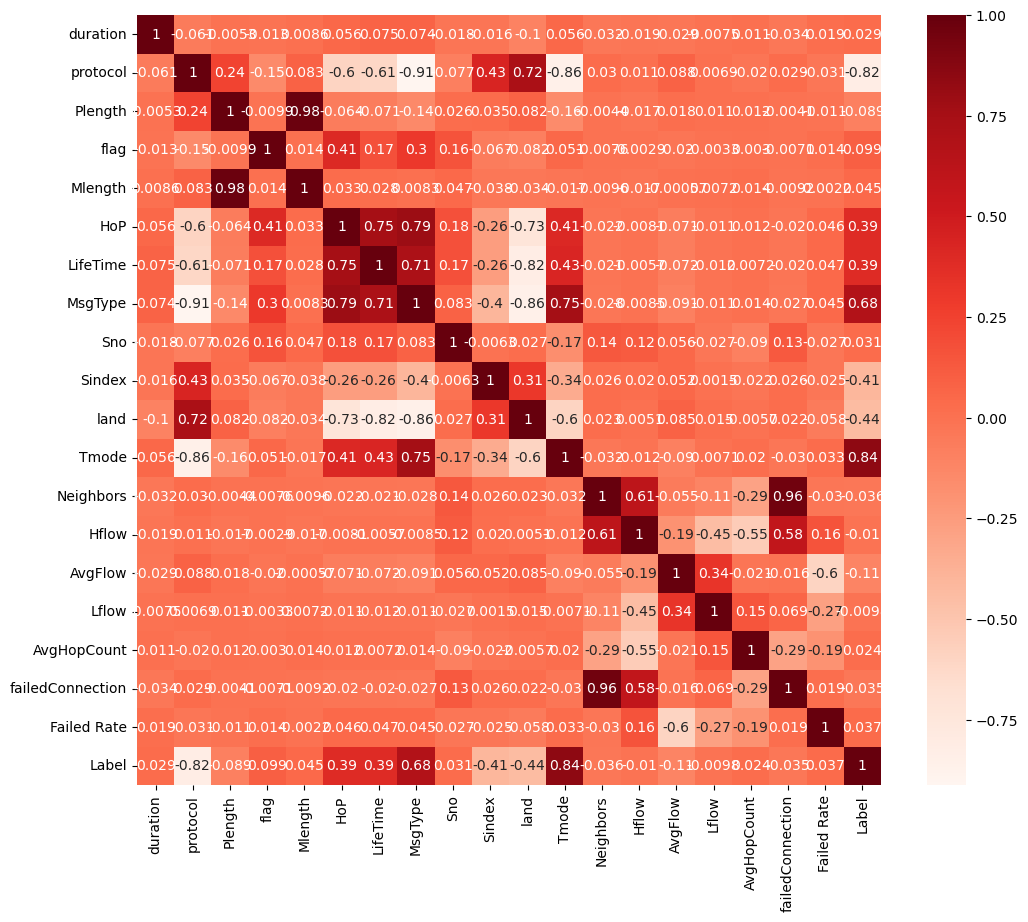

In [16]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Feature explaination:
* Plength: the length of a packet or data unit being transmitted.
* flag: is a bit or a group of bits that are used to indicate the status of a packet or a node.
* Mlength: the maximum length of a packet or data unit that can be transmitted in the network.
* Hop : refers to a step or a movement of a data packet from one device (node) to another in the network.
* Sno : a Secure Neighbor Discovery (Sno) protocol is a method for securely discovering and authenticating neighboring nodes in the network.
* LifeTime: the lifetime of a node refers to the amount of time that a node can continue to operate and participate in the network before its energy is depleted.
* MsgType: refers to the type of information that is being transmitted between nodes(Routing messages, Data messages, Control messages...)
* Tmode: refers to a specific operation mode of the network it can be used to switch the network between a normal operation mode and a power-saving mode.

## 1.2 Data Normalisation

In [17]:
df.describe()

,duration,protocol,Plength,flag,Mlength,HoP,LifeTime,MsgType,Sno,Sindex,land,Tmode,Neighbors,Hflow,AvgFlow,Lflow,AvgHopCount,failedConnection,Failed Rate,Label
count,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000
mean,0.014189,0.689811,89.589435,110.839263,25.770104,-0.766843,404.101061,0.526296,9.819489,1429.758499,1.631633,0.251398,13.758746,7236.509479,1671.795566,61.917407,0.204938,4342.024985,62.910107,0.238522
std,0.096779,0.464729,32.584956,1133.951488,32.609399,0.578324,980.532344,0.856019,9.727308,1139.028021,0.763185,0.433817,2.826686,645.978748,276.146268,107.105989,0.017860,699.159048,4.434745,0.426180
min,0.000000,0.000000,66.000000,-1.000000,10.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,6142.000000,1001.300000,1.000000,0.179579,2700.000000,56.927251,0.000000
25%,0.000999,0.000000,84.000000,-1.000000,20.000000,-1.000000,-1.000000,0.000000,4.000000,484.000000,2.000000,0.000000,12.000000,6634.000000,1483.150000,4.000000,0.190776,3741.000000,59.463764,0.000000
50%,0.001229,1.000000,92.000000,-1.000000,28.000000,-1.000000,-1.000000,0.000000,8.000000,1078.000000,2.000000,0.000000,14.000000,7260.000000,1722.500000,5.000000,0.197682,4491.000000,62.595632,0.000000
75%,0.001830,1.000000,92.000000,0.000000,28.000000,-1.000000,-1.000000,1.000000,12.000000,2254.000000,2.000000,1.000000,15.000000,7759.000000,1918.769231,27.000000,0.216141,4733.000000,68.344537,0.000000
max,0.938905,2.000000,1104.000000,16384.000000,1048.000000,6.000000,14984.000000,4.000000,125.000000,4095.000000,2.000000,1.000000,20.000000,8194.000000,2056.733333,303.000000,0.248320,5624.000000,72.685851,1.000000


In [18]:
from sklearn.preprocessing import MinMaxScaler # 
scaler=MinMaxScaler()
setname=["Plength",'flag','Mlength','LifeTime','Sno','Sindex','Hflow','AvgFlow','Lflow','failedConnection']
for name in setname:
    df[[name]]=scaler.fit_transform(df[[name]])

In [19]:
df.describe()

,duration,protocol,Plength,flag,Mlength,HoP,LifeTime,MsgType,Sno,Sindex,land,Tmode,Neighbors,Hflow,AvgFlow,Lflow,AvgHopCount,failedConnection,Failed Rate,Label
count,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000,637862.000000
mean,0.014189,0.689811,0.022726,0.006826,0.015193,-0.766843,0.027034,0.526296,0.078556,0.349147,1.631633,0.251398,13.758746,0.533387,0.635280,0.201713,0.204938,0.561568,62.910107,0.238522
std,0.096779,0.464729,0.031392,0.069207,0.031416,0.578324,0.065434,0.856019,0.077818,0.278151,0.763185,0.433817,2.826686,0.314804,0.261643,0.354656,0.017860,0.239110,4.434745,0.426180
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.179579,0.000000,56.927251,0.000000
25%,0.000999,0.000000,0.017341,0.000000,0.009634,-1.000000,0.000000,0.000000,0.032000,0.118193,2.000000,0.000000,12.000000,0.239766,0.456542,0.009934,0.190776,0.356019,59.463764,0.000000
50%,0.001229,1.000000,0.025048,0.000000,0.017341,-1.000000,0.000000,0.000000,0.064000,0.263248,2.000000,0.000000,14.000000,0.544834,0.683321,0.013245,0.197682,0.612517,62.595632,0.000000
75%,0.001830,1.000000,0.025048,0.000061,0.017341,-1.000000,0.000000,1.000000,0.096000,0.550427,2.000000,1.000000,15.000000,0.788012,0.869282,0.086093,0.216141,0.695280,68.344537,0.000000
max,0.938905,2.000000,1.000000,1.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,2.000000,1.000000,20.000000,1.000000,1.000000,1.000000,0.248320,1.000000,72.685851,1.000000


In [20]:
y = df['Label']
X=df.drop(['Label'], axis=1, inplace=True)
print('y-shape: ', y.shape)
print('x-shape: ', df.shape)

y-shape:  (637862,)
x-shape:  (637862, 19)


## 1.3 Data Split

In [21]:
from sklearn.model_selection import train_test_split #

In [22]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

In [23]:
print('x-train: ', x_train.shape)
print('y-train: ', y_train.shape)
print('x-test: ', x_test.shape)
print('y-train: ', y_train.shape)

x-train:  (427367, 19)
y-train:  (427367,)
x-test:  (210495, 19)
y-train:  (427367,)


# 2. Training Models

# 2.1 Training Neural Network

In [24]:
# Keras is a popular deep learning library that makes it easy to build and train ANNs in Python.
import keras
from keras.models import Sequential
from keras.layers import Dense

In [25]:
# Define the model
model = Sequential()
model.add(Dense(12, input_shape=(19,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                240       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
12020/12020 [==============================] - 31s 2ms/step - loss: 0.1171 - accuracy: 0.9548 - val_loss: 0.0829 - val_accuracy: 0.9632
Epoch 2/5
12020/12020 [==============================] - 31s 3ms/step - loss: 0.0676 - accuracy: 0.9757 - val_loss: 0.0690 - val_accuracy: 0.9765
Epoch 3/5
12020/12020 [==============================] - 29s 2ms/step - loss: 0.0664 - accuracy: 0.9763 - val_loss: 0.0648 - val_accuracy: 0.9760
Epoch 4/5
12020/12020 [==============================] - 30s 3ms/step - loss: 0.0660 - accuracy: 0.9762 - val_loss: 0.0653 - val_accuracy: 0.9763
Epoch 5/5
12020/12020 [==============================] - 32s 3ms/step - loss: 0.0659 - accuracy: 0.9765 - val_loss: 0.0648 - val_accuracy: 0.9759


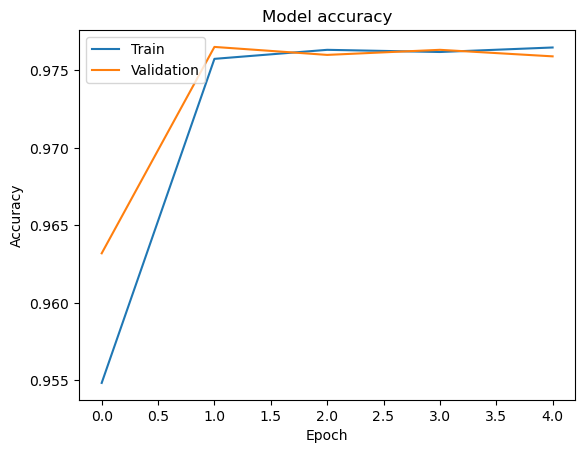

In [30]:
history=model.fit(x_train,y_train, epochs=5,validation_split=0.1, shuffle=True)
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [31]:
ANN_accuracy = model.evaluate(x_test, y_test)
print('Accuracy: train %.2f' % (ANN_accuracy[1]*100))

6578/6578 [==============================] - 18s 3ms/step - loss: 0.0647 - accuracy: 0.9768
Accuracy: train 97.68


In [32]:
ANN_accuracy=ANN_accuracy[1]*100

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
Y_predict = model.predict(x_test)
# threshold
threshold = 0.5

# convert to binary labels
Y_predict = (Y_predict > threshold).astype(int)
cm =confusion_matrix(y_test, Y_predict, labels=[0,1])
confusion = pd.DataFrame(cm, index = ['attack', 'normal'],
                        columns = ['pred_attack','pred_normal'])

6578/6578 [==============================] - 13s 2ms/step


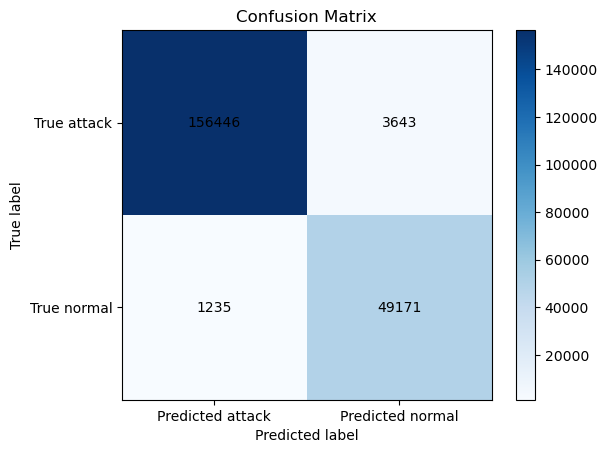

In [35]:
# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

ax.set(xticks=[0, 1], xticklabels=['Predicted attack', 'Predicted normal'],
       yticks=[0, 1], yticklabels=['True attack', 'True normal'],
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Loop over data dimensions and create text annotations.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

# add colorbar
fig.colorbar(im)
# show the plot
plt.show()

## 2.2 Training Random Forest

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [37]:
# Train the Random Forest
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(x_train, y_train)
# Predict on the test data
y_pred = randomForest.predict(x_test)
# Evaluate the model's performance
randomForest_accuracy = accuracy_score(y_test, y_pred)
print("Acuuracy score: ",randomForest_accuracy)

Acuuracy score:  0.9993016461198603


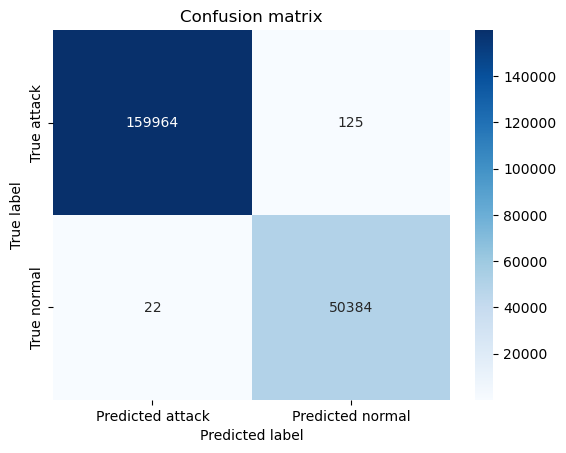

In [38]:
# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g',xticklabels=['Predicted attack', 'Predicted normal'],yticklabels=['True attack', 'True normal'],)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

# 2.3 Training LogisticRegression

In [39]:
from sklearn.linear_model import LogisticRegression

# Create and train the logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(x_train, y_train)

# Test the model on the test set
y_pred = clf.predict(x_test)
# Evaluate the model's performance
Logistic_Reg_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", Logistic_Reg_accuracy)

Accuracy:  0.9772203615287774


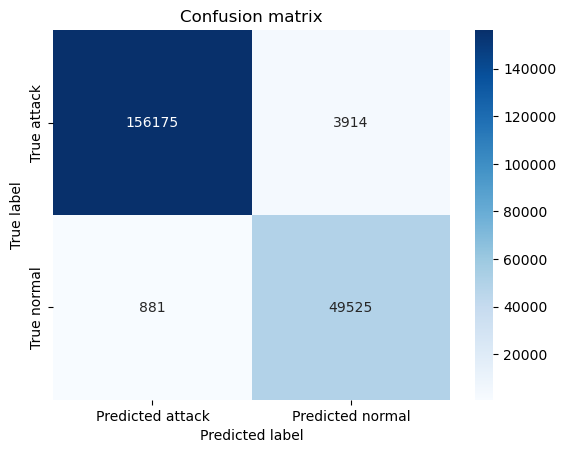

In [40]:
# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g',xticklabels=['Predicted attack', 'Predicted normal'],yticklabels=['True attack', 'True normal'],)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# 2.4 Training Gaussian Naive Bayes

In [42]:

# Train the Gaussian Naive Bayes
clf = GaussianNB()
clf.fit(x_train, y_train)

# Predict on the test data
y_pred = clf.predict(x_test)

# Evaluate the model's performance
Naive_Bayes_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", Naive_Bayes_accuracy)

Accuracy:  0.9304781586260956


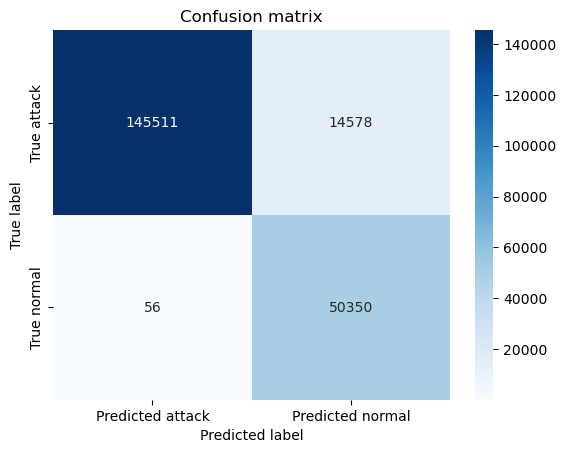

In [43]:
# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g',xticklabels=['Predicted attack', 'Predicted normal'],yticklabels=['True attack', 'True normal'],)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

# 3. Comparing our different models

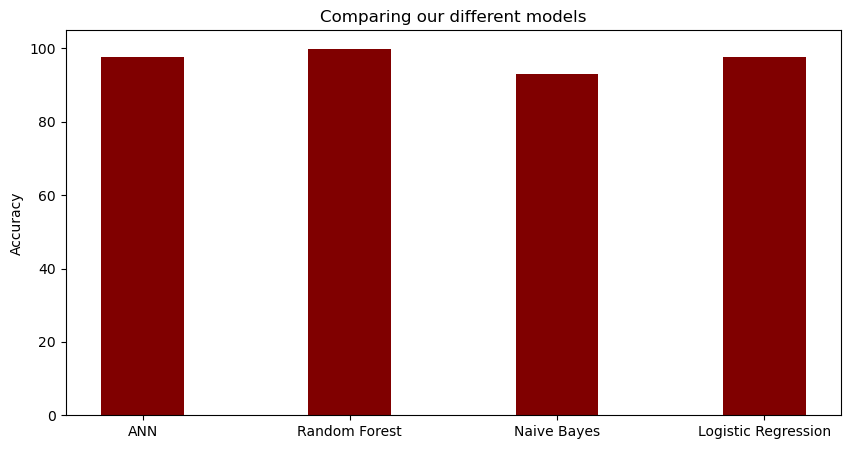

In [44]:
results={'ANN':ANN_accuracy ,
 'Random Forest': randomForest_accuracy*100,
 'Naive Bayes': Naive_Bayes_accuracy*100,
        'Logistic Regression':Logistic_Reg_accuracy*100}
courses = list(results.keys())
values = list(results.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
plt.ylabel("Accuracy")
plt.title("Comparing our different models")
plt.show()

In [ ]:
from sklearn.model_selection import KFold